Goal: Explore the data relationships of all your features and understand how the features compare to the response variable.
● Build data profiles and tables - Inferential statistics
● Explore data relationships - Data visualization
● Feature Selection and Engineering

In [1]:
# Set up the environment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Load the preprocessed data
filename = "./data/processed/college.filtered.csv"
data = pd.read_csv(filename, dtype={'OPEID':object, 'Zip':object}, index_col=0)
data.head()

,Id,OPEID,Name,City,Zip,Predominant degree,Main branch,NumBranches,Primary degree type,High degree,...,MedianDebtNotComplete,PercentReceiveFedLoan,AvgAgeEntry,PercentFemale,PercentMarried,PercentDependent,PercentVeteran,AvgFamilyIncome,MedianFamilyIncome,MedianHouseholdIncome
0,1,01230800,COMMUNITY COLLEGE OF THE AIR FORCE,MONTGOMERY,361126613,NaN,True,1,Predominantly associate's-degree granting,Associate degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,00100200,ALABAMA A & M UNIVERSITY,NORMAL,35762,NaN,True,1,Predominantly bachelor's-degree granting,Graduate degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,00105200,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,352940110,NaN,True,2,Predominantly bachelor's-degree granting,Graduate degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,00574900,ALABAMA AVIATION AND TECHNICAL COLLEGE,OZARK,36360,NaN,True,1,Predominantly certificate-degree granting,Associate degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,02503400,SOUTHERN CHRISTIAN UNIVERSITY,MONTGOMERY,361173553,NaN,True,1,Predominantly bachelor's-degree granting,Graduate degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Build data profiles and tables

What are the columns in the data? What are the data types? How many columns contain null values?

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124699 entries, 0 to 124698
Data columns (total 54 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Id                            124699 non-null  int64  
 1   OPEID                         124699 non-null  object 
 2   Name                          124699 non-null  object 
 3   City                          124699 non-null  object 
 4   Zip                           124699 non-null  object 
 5   Predominant degree            101334 non-null  float64
 6   Main branch                   124699 non-null  bool   
 7   NumBranches                   124699 non-null  int64  
 8   Primary degree type           124699 non-null  object 
 9   High degree                   124699 non-null  object 
 10  Control                       124676 non-null  object 
 11  StateCode                     124669 non-null  object 
 12  Region                        124669 non-nul

According to the data dictionary, columns 8-12 are categorical variables, however they have been imported as strings here. I can convert them to categories later, if I decide that will make them easier to work with.

Columns 45-53(and several others) contain relatively few values, so I suspect that they will need to be removed. More exploration of null values will follow later.

What are the ranges and distributions of the numerical variables?

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,124699.0,62350.000000,35997.644946,1.000000,31175.500000,62350.000000,93524.500000,1.246990e+05
Predominant degree,101334.0,1.971628,0.876321,1.000000,1.000000,2.000000,3.000000,3.000000e+00
NumBranches,124699.0,3.737648,12.623389,1.000000,1.000000,1.000000,2.000000,1.410000e+02
AdmissionRate,34156.0,0.696963,0.223910,0.000000,0.555600,0.721100,0.861525,1.000000e+01
ACTMidpoint,15871.0,22.722954,3.265049,2.000000,21.000000,22.000000,24.000000,3.500000e+01
SATAvg,18598.0,1052.701043,126.892749,514.000000,970.000000,1035.000000,1115.000000,1.599000e+03
Enrollment-DegreeSeeking,110343.0,2151.355673,4734.967374,0.000000,115.000000,490.000000,1989.000000,2.535940e+05
NetPrice-Private,18560.0,17982.273545,7462.132716,-103168.000000,13120.750000,18179.500000,22487.000000,8.757000e+04
AvgCost-AY,20504.0,23002.166699,11575.691881,2200.000000,13293.000000,21395.500000,29439.500000,7.447300e+04
TuitionRevenue/FTE,106055.0,13423.722616,138429.201381,0.000000,2489.000000,5759.000000,10627.000000,2.667016e+07


Check for null values, both as a count and as a percentage of the column data.

In [11]:
#Check for null values
nulldata = data.isnull().sum()
nulldata = pd.DataFrame(nulldata)
nulldata.columns = ["Count"]
nulldata['Percent'] = (data.isnull().sum())/data.shape[0]

print(nulldata.loc[nulldata['Percent']>0])

                               Count   Percent
Predominant degree             23365  0.187371
Control                           23  0.000184
StateCode                         30  0.000241
Region                            30  0.000241
AdmissionRate                  90543  0.726092
ACTMidpoint                   108828  0.872726
SATAvg                        106101  0.850857
Enrollment-DegreeSeeking       14356  0.115125
NetPrice-Private              106139  0.851162
AvgCost-AY                    104195  0.835572
TuitionRevenue/FTE             18644  0.149512
Expenditure/FTE                18650  0.149560
AvgFaculty Salary              55047  0.441439
Percent Fulltime Faculty       63748  0.511215
Completion-4yr                 89819  0.720286
Completion<4yr                 63229  0.507053
RetentionFT-4yr               101800  0.816366
RetentionFT-<4yr               87419  0.701040
RetentionPT-4yr               109322  0.876687
RetentionPT-<4yr              102212  0.819670
PercentFedLoa

As suggested above, columns 45-53 (and others) contain more than 70% missing data. In the preprocessing stage, columns with more than 90% of the missing data were excluded. This step will remove columns with more than 70% missing data.

In [15]:
# Make a list of columns with >70% missing data
to_drop = [column for column in data.columns if (data[column].isnull().sum()/len(data[column]) > 0.70)]
print("Columns to drop include: ", to_drop)
print("Number of columns to drop: ", len(to_drop))

# Drop column with >70% missing data
data = data.drop(to_drop, axis=1)
print(data.shape)

Columns to drop include:  []
Number of columns to drop:  0
(124699, 34)


## Explore number of schools
- How many rows are in the database?
- How many unique schools are in the database? By OPEID and by Name

In [16]:
n_data = data.shape[0]
print("There are ", n_data, " observations in the data")

n_opeid = data["OPEID"].nunique()
print("There are ", n_opeid, "unique OPEIDs in the data")
print(data.OPEID.value_counts())

There are  124699  observations in the data
There are  11511 unique OPEIDs in the data
00224900    37
00104700    23
00147900    23
01303900    21
00336800    21
            ..
005220A1     1
00278520     1
011825A1     1
02552600     1
00988400     1
Name: OPEID, Length: 11511, dtype: int64


In [17]:
data['Name'] = data['Name'].str.lower()
n_schools = data['Name'].nunique()
print("There are ", n_schools, "unique school names in the data")
print(data.Name.value_counts())

There are  14971 unique school names in the data
itt technical institute                               672
marinello school of beauty                            212
empire beauty school                                  190
lincoln technical institute                           167
ross medical education center                         148
                                                     ... 
antioch new england graduate school                     1
computer career center a division of vista college      1
everest institute-atlanta downtown                      1
joseph charles institute of cosmetology                 1
north carolina a &t state university                    1
Name: Name, Length: 14971, dtype: int64


There are 11511 OPEID numbers and 14971 unique school names in the data, which means that some schools share OPEID numbers. To get a sense for the data, I think it will be important to know how schools names relate to the OPEID numbers.

First - how many school names occur only once in the database? What are those names?

In [18]:
unique_names = data.Name.value_counts(ascending = True)[data.Name.value_counts()==1]
print(unique_names)

north carolina a &t state university                  1
joseph charles institute of cosmetology               1
everest institute-atlanta downtown                    1
computer career center a division of vista college    1
antioch new england graduate school                   1
                                                     ..
wabash valley college                                 1
minnesota school of business - moorhead               1
st thomas aquinas college                             1
saint vincent health center school of medical tech    1
miat college of technology                            1
Name: Name, Length: 2276, dtype: int64


There are 2276 school names that only occur once the database. That means that there are roughly 13000 school names that occur more than once.  How many schools occur multiple times, and how many times do they occur?

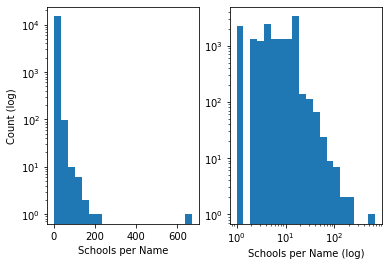

In [19]:
#Plot histogram of number of schools per Name
plt.subplot(1, 2, 1)
#plt.hist(data['Name'].value_counts())
hist, bins, _ = plt.hist(data['Name'].value_counts(), bins=20)
plt.xlabel('Schools per Name')
plt.ylabel('Count (log)')
plt.yscale('log')

plt.subplot(1, 2, 2)
# Converted to logarithmic scale
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(data['Name'].value_counts(), bins=logbins)
plt.xlabel('Schools per Name (log)')
plt.xscale('log')
plt.yscale('log')
plt.show()

There is one school with more than 600 occurences in the database, which skews the histogram and its bin sizes. Converting the number of schools (and counts) to a log scale more clearly shows the distribution of the schools by their count in the data.

While there are many unique school names, there are also equally many schools with around 100 (or 200) counts.

Now that we have a sense of how often school names are repeated in the database, we can explore the distribution of the OPEID. 

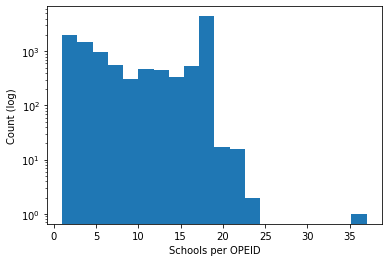

In [64]:
#Plot histogram of number of schools per OPEID
plt.hist(data['OPEID'].value_counts(), bins=20)
plt.xlabel('Schools per OPEID')
plt.ylabel('Count (log)')
plt.yscale('log')

The number of observations per OPEID are much less varied than the school names, with the max count being around 35. This must mean that schools with the same name can have multiple OPEIDs.

From the list and counts of school names (above), ITT Technical Institute occurs 672 times in the database. How many OPEIDs are associated with ITT Tech?

In [20]:
itt = data.loc[data['Name'].str.startswith('itt tech')] # TECHNICAL INSTITUTE']
print(itt.OPEID.value_counts())
print("ITT Technical Institue has 672 schools distrubted over 254 OPEIDs")

00732902    18
00732900    18
03071801    18
00732901    18
03071800    18
            ..
02361004     1
01062706     1
02321903     1
10732957     1
03070401     1
Name: OPEID, Length: 254, dtype: int64
ITT Technical Institue has 672 schools distrubted over 254 OPEIDs


The maximum number of OPEIDs associated with ITT Tech is 18. How are the schools/names associated with one OPEID related?

In [68]:
itt_sample = data.loc[data.OPEID == '00732903']
itt_sample

,Unnamed: 0,Id,OPEID,Name,City,Zip,Predominant degree,Main branch,NumBranches,Primary degree type,...,MedianDebtNotComplete,PercentReceiveFedLoan,AvgAgeEntry,PercentFemale,PercentMarried,PercentDependent,PercentVeteran,AvgFamilyIncome,MedianFamilyIncome,MedianHouseholdIncome
5701,5701,5702,00732903,itt technical institute-houston,HOUSTON,770905818,NaN,True,4,Predominantly associate's-degree granting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12240,12240,12241,00732903,itt technical institute,HOUSTON,770905818,NaN,True,5,Predominantly associate's-degree granting,...,3938.5,0.97,23.840000,0.17,0.19,0.50,0.13,42427.12,31600.0,61951.60
18783,18783,18784,00732903,itt technical institute,HOUSTON,770905818,2.0,True,6,Predominantly associate's-degree granting,...,3928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25218,25218,25219,00732903,itt technical institute,HOUSTON,770905818,2.0,True,6,Predominantly associate's-degree granting,...,4417.0,0.95,23.760000,0.15,0.19,0.51,0.12,43526.87,31935.5,61314.68
31583,31583,31584,00732903,itt technical institute,HOUSTON,770905818,2.0,True,6,Predominantly associate's-degree granting,...,4417.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38058,38058,38059,00732903,itt technical institute,HOUSTON,770905821,2.0,True,6,Predominantly associate's-degree granting,...,4417.0,0.95,24.700001,0.18,0.21,0.45,0.12,44829.07,32827.0,62795.05
44589,44589,44590,00732903,itt technical institute,HOUSTON,77090-5821,2.0,True,6,Predominantly associate's-degree granting,...,5348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51083,51083,51084,00732903,itt technical institute,HOUSTON,77090-5818,2.0,True,6,Predominantly associate's-degree granting,...,4886.5,0.96,25.270000,0.18,0.22,0.42,0.13,40693.50,30321.0,62414.22
57592,57592,57593,00732903,itt technical institute,HOUSTON,77090-581,2.0,True,6,Predominantly associate's-degree granting,...,4417.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64220,64220,64221,00732903,itt technical institute,Houston,77090-5821,2.0,True,6,Predominantly associate's-degree granting,...,4417.0,0.95,26.389999,0.30,0.26,0.36,0.12,38528.87,27749.0,61232.20


All of these schools are in Houston. They may have different names - some include the name "Houston" or "Houston-North."
They also all have different IDs, which leads to some questions about how the ID number relates to the OPEID and the school name. This information may be in the data dictionary, or other meta-data documents.

## Explore more individual columns
Reprint the column names, to kow what to analyze next.

In [21]:
data.columns

Index(['Id', 'OPEID', 'Name', 'City', 'Zip', 'Predominant degree',
       'Main branch', 'NumBranches', 'Primary degree type', 'High degree',
       'Control', 'StateCode', 'Region', 'Enrollment-DegreeSeeking',
       'CURROPER', 'TuitionRevenue/FTE', 'Expenditure/FTE',
       'AvgFaculty Salary', 'Percent Fulltime Faculty', 'Completion<4yr',
       'PercentAge>25', 'PercentCompleted4yr', 'PercentWithdraw4yr',
       'PercentEnrolled4yr', 'PercentAidedLowIncome', 'PercentIndependent',
       'PercentDependentLowIncome', 'PercentIndepentdentLowIncome',
       'PercentFirstGen', 'AvgIncomeDependent', 'AvgIncomeIndep', 'MedianDebt',
       'MedianDebtCompleters', 'MedianDebtNotComplete'],
      dtype='object')

What are the values (and distributions) of the "Predominant degree" column?

In the preprocessing step, this column was converted to a category. It is being processed here as a float. It is unclear at this point how the original string categories were converted to numbers. (To be investigated further.)

In [24]:
data['Predominant degree'].value_counts()
# plt.hist(data['Predominant degree'])
# plt.xlabel('Degree code')
# plt.ylabel('Count')
# plt.show()

1.0    40387
3.0    37512
2.0    23435
Name: Predominant degree, dtype: int64

What are the values (and distributions) of the "Main branch" column?

Result: all of the observations in the data are coded as a "Main branch" which means it is not a meaningful variable, so I'll drop it.

In [31]:
print(data['Main branch'].value_counts())

data= data.drop('Main branch', axis=1)

True    124699
Name: Main branch, dtype: int64


,Id,OPEID,Name,City,Zip,Predominant degree,NumBranches,Primary degree type,High degree,Control,...,PercentAidedLowIncome,PercentIndependent,PercentDependentLowIncome,PercentIndepentdentLowIncome,PercentFirstGen,AvgIncomeDependent,AvgIncomeIndep,MedianDebt,MedianDebtCompleters,MedianDebtNotComplete
0,1,01230800,community college of the air force,MONTGOMERY,361126613,NaN,1,Predominantly associate's-degree granting,Associate degree,Public,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,00100200,alabama a & m university,NORMAL,35762,NaN,1,Predominantly bachelor's-degree granting,Graduate degree,Public,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,00105200,university of alabama at birmingham,BIRMINGHAM,352940110,NaN,2,Predominantly bachelor's-degree granting,Graduate degree,Public,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,00574900,alabama aviation and technical college,OZARK,36360,NaN,1,Predominantly certificate-degree granting,Associate degree,Public,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,02503400,southern christian university,MONTGOMERY,361173553,NaN,1,Predominantly bachelor's-degree granting,Graduate degree,Private nonprofit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since all schools are labeled as main branches, how many other branches are associated with each school? This is in the NumBranches column.

1      91561
2      11535
3       5970
4       3286
5       2010
6       1490
8        758
7        752
9        633
11       584
10       579
23       347
14       314
141      282
78       234
13       234
74       222
22       198
19       192
31       186
26       182
86       172
28       171
16       161
38       152
12       149
17       136
15       136
128      128
42       126
20       120
119      119
99       101
93        95
18        92
44        88
84        85
85        85
39        78
72        72
68        72
71        71
70        70
63        63
60        60
59        59
27        54
54        54
51        51
50        50
21        42
41        41
40        40
36        36
34        34
33        33
30        30
24        24
Name: NumBranches, dtype: int64


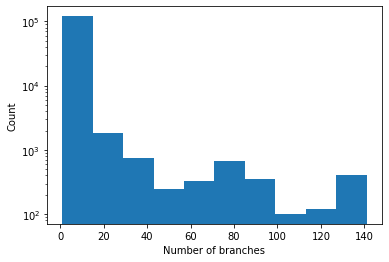

In [37]:
print(data['NumBranches'].value_counts())
plt.hist(data['NumBranches'])
plt.xlabel('Number of branches')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

Most of the schools (91561) have only one branch, while a few have more than 100 branches. It might be interesting to investigate this more.

What are the values and distribution of the 'Primary degree type' column? In the preprocessing step, they were converted to categorical data, but they have been imported here as a string. Should they be re-convereted to categorical data?

In [41]:
print(data['Primary degree type'].value_counts())
data['Primary degree type'].astype('category')

Predominantly certificate-degree granting    52605
Predominantly bachelor's-degree granting     35199
Predominantly associate's-degree granting    26670
Not classified                                5228
Entirely graduate-degree granting             4997
Name: Primary degree type, dtype: int64


0         Predominantly associate's-degree granting
1          Predominantly bachelor's-degree granting
2          Predominantly bachelor's-degree granting
3         Predominantly certificate-degree granting
4          Predominantly bachelor's-degree granting
                            ...                    
124694                               Not classified
124695                               Not classified
124696                               Not classified
124697                               Not classified
124698                               Not classified
Name: Primary degree type, Length: 124699, dtype: category
Categories (5, object): [Entirely graduate-degree granting, Not classified, Predominantly associate's-degree granting, Predominantly bachelor's-degree granting, Predominantly certificate-degree granting]

Based on the 5 different values, it does seem that this column contains categorical data, so it has been adjusted accordingly. I'm am primarily intersted in undergraduate institutions, and may drop the 'Entirely graduate-degree granting' institutions for further analysis at a later time.

What are the values and distributions in the 'High degree' column? (How are these related to the Primary degree type)?

In [42]:
print(data['High degree'].value_counts())
data['High degree'].astype('category')

Certificate degree     42894
Graduate degree        32252
Associate degree       30733
Bachelor's degree      13592
Non-degree-granting     5228
Name: High degree, dtype: int64


0            Associate degree
1             Graduate degree
2             Graduate degree
3            Associate degree
4             Graduate degree
                 ...         
124694    Non-degree-granting
124695    Non-degree-granting
124696    Non-degree-granting
124697    Non-degree-granting
124698    Non-degree-granting
Name: High degree, Length: 124699, dtype: category
Categories (5, object): [Associate degree, Bachelor's degree, Certificate degree, Graduate degree, Non-degree-granting]

Since there are only 5 values, it seems that this column should be treated categorically as well. Interstingly, there are 5228 non-degree-granting institutions, which is the same number as the "Not classifed" category in the 'Primary degree type' column. 

The following pivot table shows how the categories in these two columns are related. Indeed, the 5228 Non-degree granting institutions from 'High degree" are the same as the 'Not classified' schools from 'Primary degree type'.

In [66]:
degree = data.pivot_table(index='Primary degree type', columns='High degree', aggfunc='size')
degree

High degree,Associate degree,Bachelor's degree,Certificate degree,Graduate degree,Non-degree-granting
Primary degree type,,,,,
Entirely graduate-degree granting,NaN,NaN,NaN,4997.0,NaN
Not classified,NaN,NaN,NaN,NaN,5228.0
Predominantly associate's-degree granting,22047.0,3842.0,NaN,781.0,NaN
Predominantly bachelor's-degree granting,NaN,9239.0,NaN,25960.0,NaN
Predominantly certificate-degree granting,8686.0,511.0,42894.0,514.0,NaN


Next steps:

Explore (univariately) more columns

Of most interest:
Control (public, private nonprofit, private for-profit)

Statecode and Region - suspect they will be correlated - don't need both

'Enrollment-DegreeSeeking'
'TuitionRevenue/FTE'
'Expenditure/FTE'
'AvgFaculty Salary'
'Percent Fulltime Faculty'
'Completion<4yr'
'PercentAge>25'
'PercentCompleted4yr'
'PercentWithdraw4yr'
'PercentEnrolled4yr'
'PercentAidedLowIncome'
'PercentIndependent'
'PercentDependentLowIncome'
'PercentIndepentdentLowIncome'
'PercentFirstGen'
'AvgIncomeDependent'
'AvgIncomeIndep'
'MedianDebt'
'MedianDebtCompleters'
'MedianDebtNotComplete'

CURROPER is the main variable...Some already done below.

## Explore CURROPER column
- How many schools are open vs closed?
- What percentage of schools are open vs closed?
- Does this relate to main branch vs non?
- How does this relate to control?

In [69]:
# How many schools are closed?
num_open = data['CURROPER'].sum()
print('Open:  ', num_open)

closed = data.loc[data['CURROPER']==False]
print('Closed:  ', closed.shape[0])

Open:   101121
Closed:   23578


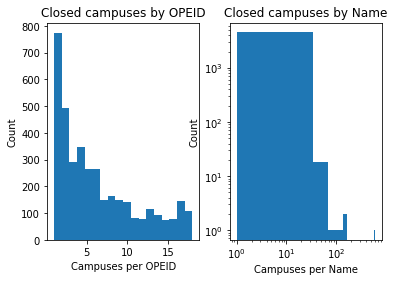

In [70]:
#How many schools are open/closed by name? by OPEID?
closed.OPEID.value_counts()

plt.subplot(1, 2, 1)
plt.hist(closed.OPEID.value_counts(), bins=18)
plt.xlabel('Campuses per OPEID')
plt.ylabel('Count')
plt.title('Closed campuses by OPEID')

plt.subplot(1, 2, 2)
plt.hist(closed.Name.value_counts(), bins=18)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Campuses per Name')
plt.ylabel('Count')
plt.title('Closed campuses by Name')
plt.tight_layout
plt.show()


Text(0.5, 1.0, 'Boxplots of Percent First Generation students by School type')

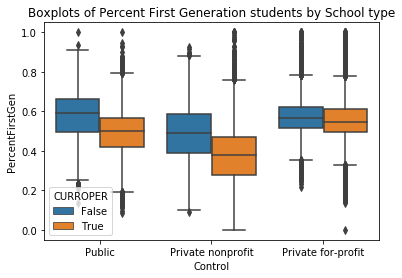

In [9]:
#Choose columns with >15% missing values that might be intersting to explore
to_explore = ['PercentFirstGen', 'AvgIncomeDependent','AvgIncomeIndep', 'PercentIndependent', 'TuitionRevenue/FTE', 'Expenditure/FTE', 'Enrollment-DegreeSeeking']

#Create boxplots of the colunms
sns.boxplot('Control', 'PercentFirstGen', data=data, hue = 'CURROPER')

plt.title('Boxplots of Percent First Generation students by School type')

Comments - Closed schools have slightly higher first generation percentages than open schools for all three types of schools. Open nonprofit private schools have lowest first gen percentages.

Text(0.5, 1.0, 'Boxplots of Student Enrollment by School type')

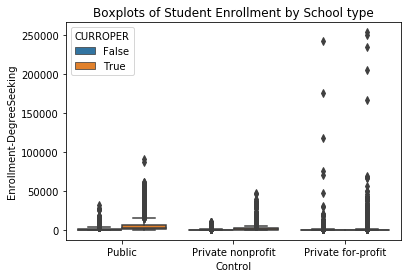

In [10]:
sns.boxplot('Control', 'Enrollment-DegreeSeeking', data=data, hue = 'CURROPER')
plt.title('Boxplots of Student Enrollment by School type')

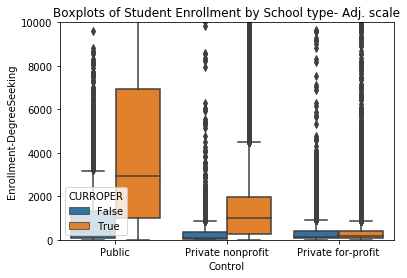

In [73]:
sns.boxplot('Control', 'Enrollment-DegreeSeeking', data=data, hue = 'CURROPER')
plt.title('Boxplots of Student Enrollment by School type- Adj. scale')
plt.ylim((0,10000))
plt.show()

Private for-profit schools can have much higher enrollments than the other two types of schools. Interestingly, some of the closed for-profit schools have really high enrollments.

Text(0.5, 1.0, 'Boxplots of Tuition Revene per student by School type')

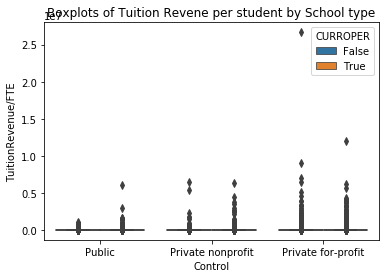

In [12]:
sns.boxplot('Control', 'TuitionRevenue/FTE', data=data, hue = 'CURROPER')
plt.title('Boxplots of Tuition Revene per student by School type')

Private-for profit school has an extreme outlier - which school is it?

Text(0.5, 1.0, 'Boxplots of Expenditure per student by School type')

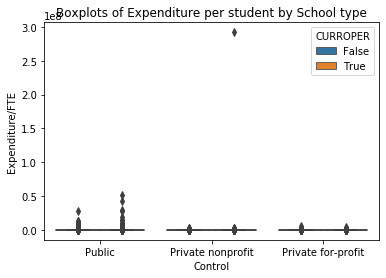

In [13]:
sns.boxplot('Control', 'Expenditure/FTE', data=data, hue = 'CURROPER')
plt.title('Boxplots of Expenditure per student by School type')

Extreme outlier in closed nonprofit private school is distorting the data.

### Inferential Statistics Hint: 
Do any particular results in your data strike you as [abnormal]? What hypotheses can you form (Null and Alternative hypotheses) which you could go on to test? Take some time to recall your statistical concepts, such as that the [p-value] of an observation is the probability of seeing data at least as extreme as that observation, on the assumption of the null hypothesis.

Private-for profit school has an extreme outlier - which school is it?

In [14]:
Extreme outlier in closed nonprofit private school is distorting the data.

SyntaxError: invalid syntax (<ipython-input-14-598632878515>, line 1)

## Explore data relationships

### Data Visualization Hint: 
Recall your [matplotlib] and [seaborn] functions for data visualization: 
Matplotlib:
- plt.plot()
- plt.xlabel() 
- plt.show() 
- plt.hist(),
Seaborn:
- sns.relplot() 
- sns.lmplot() 
- sns.catplot().

### Feature Selection and Engineering Hint: 
Feature selection is where data storytelling starts: we tell a story as soon as we include certain features and omit others. But how we manipulate - or engineer - those fields is just as important. Recall the crucial elements to feature engineering:
- If you have categorical features, you might need to [one-hot encode] them
- You may need to [binarize] your columns and [bin] your values.
- To handle missing data, think about how appropriate the methods of [listwise
deletion, data imputation, replacing missing values with constants] or simply attempting to [find the missing values] are for your data.
- Think about whether you need to [standardize, log-transform or normalize] your data, as well as statistically valid ways to remove outliers.

## Questions to answer
Are there variables that are particularly significant in terms of explaining the answer to your project question?
● Are there significant differences between subgroups in your data that may be relevant to your project aim?
● Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?
● What are the most appropriate tests to use to analyze these relationships?